In [5]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import colors

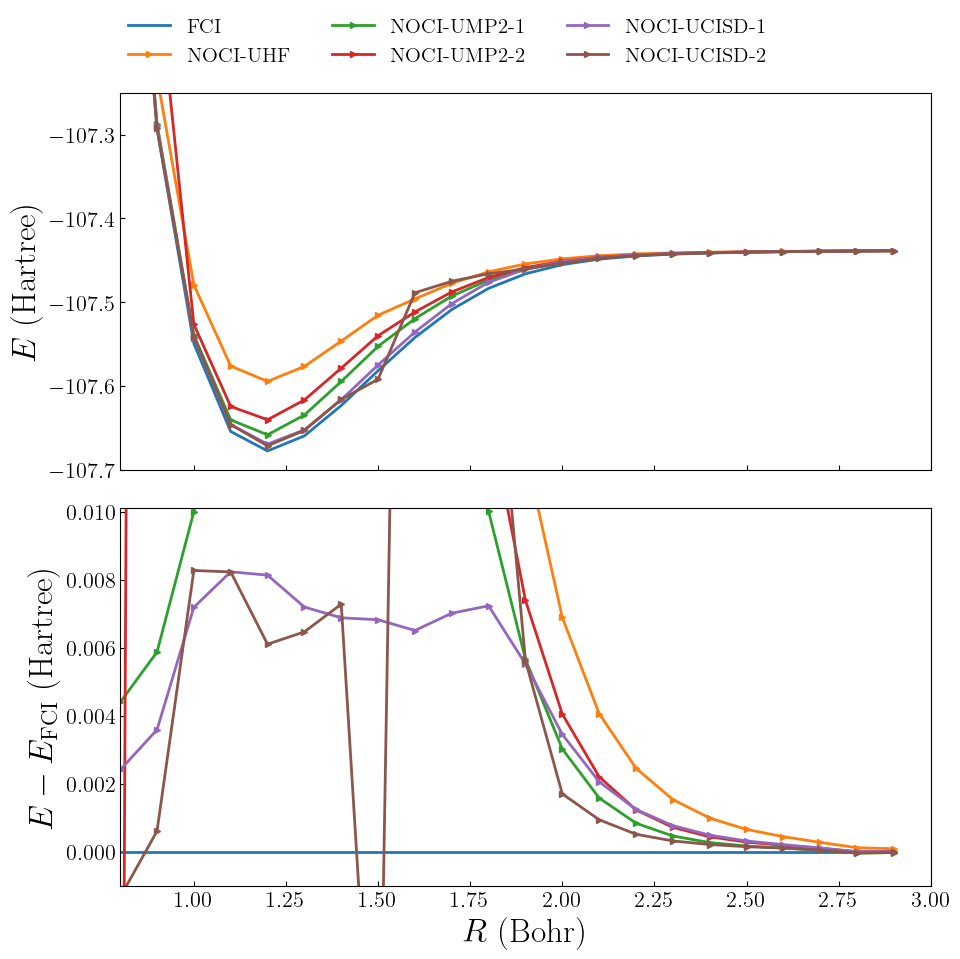

In [21]:
label_list = []
label_list.append("ene_fci")
# label_list.append("ene_rhf")
# label_list.append("ene_uhf")
# label_list.append("ene_ump2")
# label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ump2_2")
label_list.append("ene_noci_ucisd_1")
label_list.append("ene_noci_ucisd_2")

data_dict  = get_plot_data("../data/n2-sto-3g.h5")
style_dict = get_plot_style(label_list)

fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey="row")

ax = axs[0]
for i, label in enumerate(label_list):
    x = data_dict[label][:,0]
    y = data_dict[label][:,1] + data_dict["ene_nuc"][:,1]
    ax.plot(x, y, **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_xlim(0.8, 3.0)
ax.set_ylim(-107.70, -107.25)

ax = axs[1]
for i, label in enumerate(label_list):
    x = data_dict[label][:,0]
    y = data_dict[label][:,1] - data_dict["ene_fci"][:,1]
    ax.plot(x, y, **style_dict[label])

ax.set_ylabel(r"$E - E_{\rm FCI}$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")
ax.set_ylim(-0.001, 0.0101)

fig.tight_layout(w_pad=0.8, h_pad=0.8)